In [229]:
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
import numpy as np
import scipy
import cv2

### Data Loading

In [156]:
mask_threshold = 200
prewitt_h = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
prewitt_v = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

Image shape: (450, 600, 3)
Channel Mask shape: (450, 600, 3)
Pixel Mask shape: (450, 600)
Data shape: (450, 600, 15)

Mean shape: (15,)
FG Mean shape: (15,)
BG Mean shape: (15,)

Cov shape: (15, 15)
FG Cov shape: (15, 15)
BG Cov shape: (15, 15)

Num Pixels: 270000
Num FG Pixels: 74038
Num BG Pixels: 195962


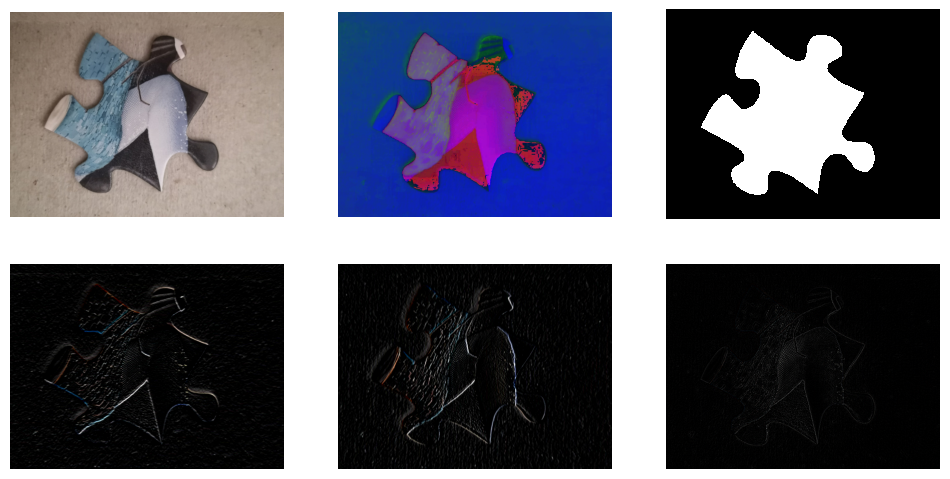

In [157]:
train_image = cv2.imread('./images/image-35.jpg')[:,:,[2,1,0]]

train_rgb = train_image.astype(np.float32) / 255
train_hsv = cv2.cvtColor(train_image, cv2.COLOR_RGB2HSV).astype(np.float32) / 255
train_prewitt_h = cv2.filter2D(src=train_image, kernel=prewitt_h, ddepth=-1)
train_prewitt_v = cv2.filter2D(src=train_image, kernel=prewitt_v, ddepth=-1)
train_laplacian = cv2.filter2D(src=train_image, kernel=laplacian, ddepth=-1)

train_channel_mask = (cv2.imread('./images/mask-35.png')[:,:,:] >= mask_threshold)
train_pixel_mask = (cv2.imread('./images/mask-35.png')[:,:,0] >= mask_threshold)

train_data = np.zeros((*train_image.shape[:2], 15))
train_data[:,:,:3] = train_rgb
train_data[:,:,3:6] = train_hsv
train_data[:,:,6:9] = train_prewitt_h
train_data[:,:,9:12] = train_prewitt_v
train_data[:,:,12:] = train_laplacian

train_mean = np.mean(train_data, axis=(0,1))
train_fg_mean = np.mean(train_data[train_pixel_mask], axis=0)
train_bg_mean = np.mean(train_data[np.invert(train_pixel_mask)], axis=0)

train_cov = np.cov(train_data.reshape(-1,15).transpose())
train_fg_cov = np.cov(train_data[train_pixel_mask].transpose())
train_bg_cov = np.cov(train_data[np.invert(train_pixel_mask)].transpose())

train_n = int(train_image.shape[1] * train_image.shape[0])
train_fg_n = int(train_data[train_pixel_mask].shape[0])
train_bg_n = int(train_data[np.invert(train_pixel_mask)].shape[0])

print("Image shape:", train_image.shape)
print("Channel Mask shape:", train_channel_mask.shape)
print("Pixel Mask shape:", train_pixel_mask.shape)
print("Data shape:", train_data.shape)
print("")
print("Mean shape:", train_mean.shape)
print("FG Mean shape:", train_fg_mean.shape)
print("BG Mean shape:", train_bg_mean.shape)
print("")
print("Cov shape:", train_cov.shape)
print("FG Cov shape:", train_fg_cov.shape)
print("BG Cov shape:", train_bg_cov.shape)
print("")
print("Num Pixels:", train_n)
print("Num FG Pixels:", train_fg_n)
print("Num BG Pixels:", train_bg_n)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,6))

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')

_ = ax[0, 0].imshow(train_image)
_ = ax[0, 1].imshow(train_hsv)
_ = sns.heatmap(data=train_pixel_mask, cmap='grey', cbar=False, ax=ax[0, 2])

_ = ax[1, 0].imshow(train_prewitt_h)
_ = ax[1, 1].imshow(train_prewitt_v)
_ = ax[1, 2].imshow(train_laplacian)
plt.show()
plt.close()

Image shape: (450, 600, 3)
Channel Mask shape: (450, 600, 3)
Pixel Mask shape: (450, 600)
Data shape: (450, 600, 15)

Mean shape: (15,)
FG Mean shape: (15,)
BG Mean shape: (15,)

Cov shape: (15, 15)
FG Cov shape: (15, 15)
BG Cov shape: (15, 15)

Num Pixels: 270000
Num FG Pixels: 59779
Num BG Pixels: 210221


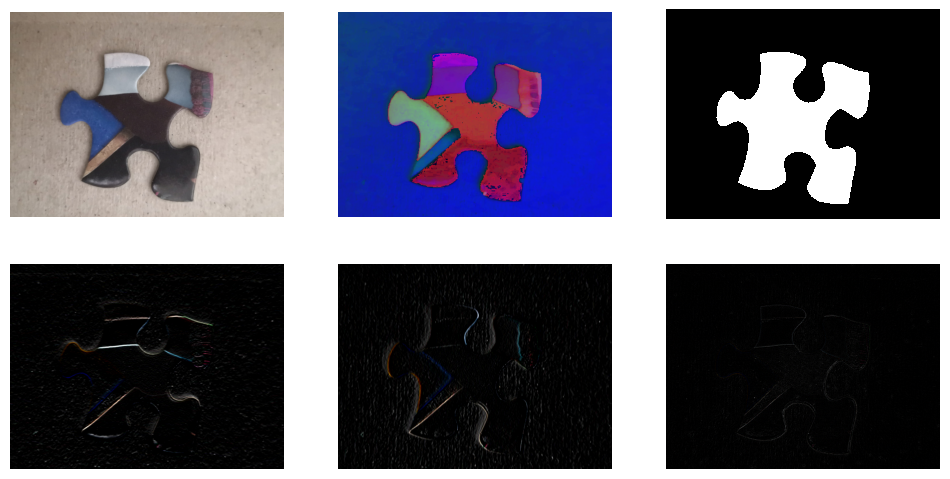

In [274]:
validate_image = cv2.imread('./images/image-83.jpg')[:,:,[2,1,0]]

validate_rgb = validate_image.astype(np.float32) / 255
validate_hsv = cv2.cvtColor(validate_image, cv2.COLOR_RGB2HSV).astype(np.float32) / 255
validate_prewitt_h = cv2.filter2D(src=validate_image, kernel=prewitt_h, ddepth=-1)
validate_prewitt_v = cv2.filter2D(src=validate_image, kernel=prewitt_v, ddepth=-1)
validate_laplacian = cv2.filter2D(src=validate_image, kernel=laplacian, ddepth=-1)

validate_channel_mask = (cv2.imread('./images/mask-83.png')[:,:,:] >= mask_threshold)
validate_pixel_mask = (cv2.imread('./images/mask-83.png')[:,:,0] >= mask_threshold)
validate_flat_mask = validate_pixel_mask.flatten()

validate_data = np.zeros((*validate_image.shape[:2], 15))
validate_data[:,:,:3] = validate_rgb
validate_data[:,:,3:6] = validate_hsv
validate_data[:,:,6:9] = validate_prewitt_h
validate_data[:,:,9:12] = validate_prewitt_v
validate_data[:,:,12:] = validate_laplacian

validate_mean = np.mean(validate_data, axis=(0,1))
validate_fg_mean = np.mean(validate_data[validate_pixel_mask], axis=0)
validate_bg_mean = np.mean(validate_data[np.invert(validate_pixel_mask)], axis=0)

validate_cov = np.cov(validate_data.reshape(-1,15).transpose())
validate_fg_cov = np.cov(validate_data[validate_pixel_mask].transpose())
validate_bg_cov = np.cov(validate_data[np.invert(validate_pixel_mask)].transpose())

validate_n = int(validate_image.shape[1] * validate_image.shape[0])
validate_fg_n = int(validate_data[validate_pixel_mask].shape[0])
validate_bg_n = int(validate_data[np.invert(validate_pixel_mask)].shape[0])

print("Image shape:", validate_image.shape)
print("Channel Mask shape:", validate_channel_mask.shape)
print("Pixel Mask shape:", validate_pixel_mask.shape)
print("Data shape:", validate_data.shape)
print("")
print("Mean shape:", validate_mean.shape)
print("FG Mean shape:", validate_fg_mean.shape)
print("BG Mean shape:", validate_bg_mean.shape)
print("")
print("Cov shape:", validate_cov.shape)
print("FG Cov shape:", validate_fg_cov.shape)
print("BG Cov shape:", validate_bg_cov.shape)
print("")
print("Num Pixels:", validate_n)
print("Num FG Pixels:", validate_fg_n)
print("Num BG Pixels:", validate_bg_n)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,6))

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')

_ = ax[0, 0].imshow(validate_image)
_ = ax[0, 1].imshow(validate_hsv)
_ = sns.heatmap(data=validate_pixel_mask, cmap='grey', cbar=False, ax=ax[0, 2])

_ = ax[1, 0].imshow(validate_prewitt_h)
_ = ax[1, 1].imshow(validate_prewitt_v)
_ = ax[1, 2].imshow(validate_laplacian)
plt.show()
plt.close()

Image shape: (450, 600, 3)
Channel Mask shape: (450, 600, 3)
Pixel Mask shape: (450, 600)
Data shape: (450, 600, 15)

Mean shape: (15,)
FG Mean shape: (15,)
BG Mean shape: (15,)

Cov shape: (15, 15)
FG Cov shape: (15, 15)
BG Cov shape: (15, 15)

Num Pixels: 270000
Num FG Pixels: 60293
Num BG Pixels: 209707


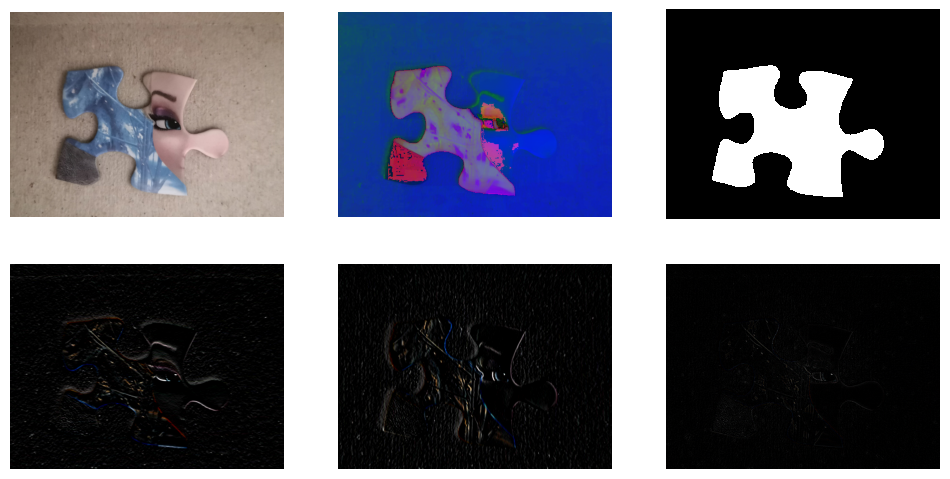

In [275]:
test_image = cv2.imread('./images/image-110.jpg')[:,:,[2,1,0]]

test_rgb = test_image.astype(np.float32) / 255
test_hsv = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV).astype(np.float32) / 255
test_prewitt_h = cv2.filter2D(src=test_image, kernel=prewitt_h, ddepth=-1)
test_prewitt_v = cv2.filter2D(src=test_image, kernel=prewitt_v, ddepth=-1)
test_laplacian = cv2.filter2D(src=test_image, kernel=laplacian, ddepth=-1)

test_channel_mask = (cv2.imread('./images/mask-110.png')[:,:,:] >= mask_threshold)
test_pixel_mask = (cv2.imread('./images/mask-110.png')[:,:,0] >= mask_threshold)
test_flat_mask = test_pixel_mask.flatten()

test_data = np.zeros((*test_image.shape[:2], 15))
test_data[:,:,:3] = test_rgb
test_data[:,:,3:6] = test_hsv
test_data[:,:,6:9] = test_prewitt_h
test_data[:,:,9:12] = test_prewitt_v
test_data[:,:,12:] = test_laplacian

test_mean = np.mean(test_data, axis=(0,1))
test_fg_mean = np.mean(test_data[test_pixel_mask], axis=0)
test_bg_mean = np.mean(test_data[np.invert(test_pixel_mask)], axis=0)

test_cov = np.cov(test_data.reshape(-1,15).transpose())
test_fg_cov = np.cov(test_data[test_pixel_mask].transpose())
test_bg_cov = np.cov(test_data[np.invert(test_pixel_mask)].transpose())

test_n = int(test_image.shape[1] * test_image.shape[0])
test_fg_n = int(test_data[test_pixel_mask].shape[0])
test_bg_n = int(test_data[np.invert(test_pixel_mask)].shape[0])

print("Image shape:", test_image.shape)
print("Channel Mask shape:", test_channel_mask.shape)
print("Pixel Mask shape:", test_pixel_mask.shape)
print("Data shape:", test_data.shape)
print("")
print("Mean shape:", test_mean.shape)
print("FG Mean shape:", test_fg_mean.shape)
print("BG Mean shape:", test_bg_mean.shape)
print("")
print("Cov shape:", test_cov.shape)
print("FG Cov shape:", test_fg_cov.shape)
print("BG Cov shape:", test_bg_cov.shape)
print("")
print("Num Pixels:", test_n)
print("Num FG Pixels:", test_fg_n)
print("Num BG Pixels:", test_bg_n)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,6))

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')

_ = ax[0, 0].imshow(test_image)
_ = ax[0, 1].imshow(test_hsv)
_ = sns.heatmap(data=test_pixel_mask, cmap='grey', cbar=False, ax=ax[0, 2])

_ = ax[1, 0].imshow(test_prewitt_h)
_ = ax[1, 1].imshow(test_prewitt_v)
_ = ax[1, 2].imshow(test_laplacian)
plt.show()
plt.close()

### Descriptive Statistics

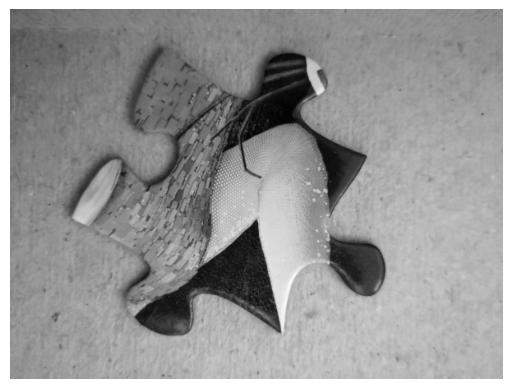

In [159]:
train_grey = cv2.cvtColor(train_image, cv2.COLOR_RGB2GRAY)
plt.axis('off')
_ = plt.imshow(train_grey, cmap='grey')
plt.show()
plt.close()

In [160]:
print("1.\tImage Width:", train_grey.shape[1])
print("\tImage Height:", train_grey.shape[0])
print("2.\tNum White Pixels:", train_pixel_mask.sum())
print("3.\tMax Pixel:", np.max(train_grey))
print("4.\tMax Puzzle Pixel:", np.max(train_grey[train_pixel_mask]))
print("5.\tMean Pixel Intensity:", np.mean(train_grey))
print("6.\tMean Puzzle Pixel Intensity:", np.mean(train_grey[train_pixel_mask]))
print("7.\tMean BG Pixel Intensity:", np.mean(train_grey[np.invert(train_pixel_mask)]))
print("8.\tVariance of Puzzle Pixel Intensity:", np.var(train_grey[train_pixel_mask]))
print("9.\tVariance of BG Pixel Intensity:", np.var(train_grey[np.invert(train_pixel_mask)]))

1.	Image Width: 600
	Image Height: 450
2.	Num White Pixels: 74038
3.	Max Pixel: 230
4.	Max Puzzle Pixel: 230
5.	Mean Pixel Intensity: 137.90452222222223
6.	Mean Puzzle Pixel Intensity: 112.65548772252087
7.	Mean BG Pixel Intensity: 147.44406568620448
8.	Variance of Puzzle Pixel Intensity: 2484.9768163016065
9.	Variance of BG Pixel Intensity: 516.1439024095819


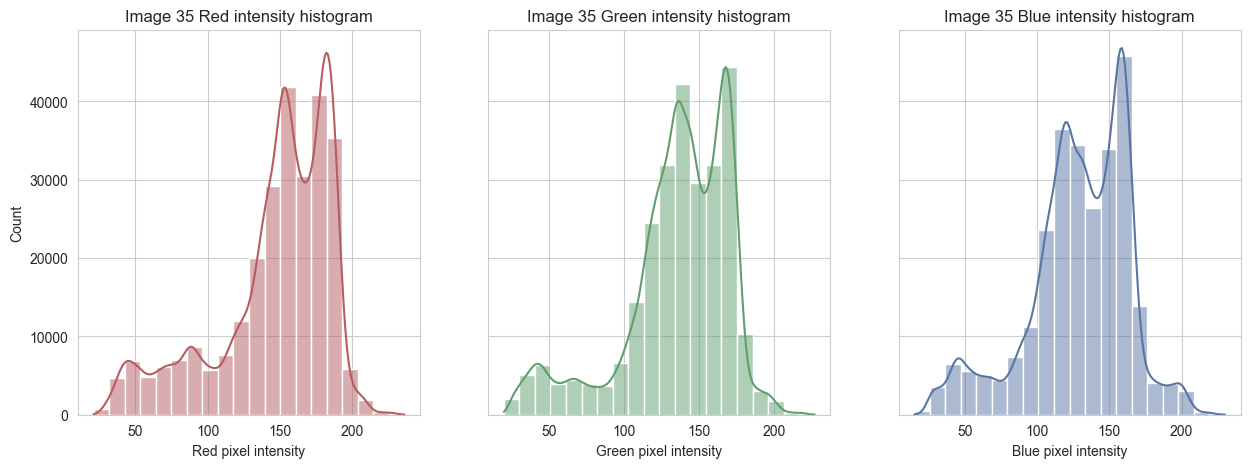

In [161]:
fig, ax = plt.subplots(ncols = 3, sharey=True, figsize=(15,5))
sns.set_style("whitegrid")

channel = ["Red", "Green", "Blue"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    ax[c].set_title(f"Image 35 {channel[c]} intensity histogram")
    ax[c].set_xlabel(f"{channel[c]} pixel intensity")
    sns.histplot(
        stat='count',
        bins='sturges',
        data=train_image[:,:,c].flatten(),
        ax=ax[c],
        color=channel_colours[c],
        kde=True
    )
plt.show()
plt.close()

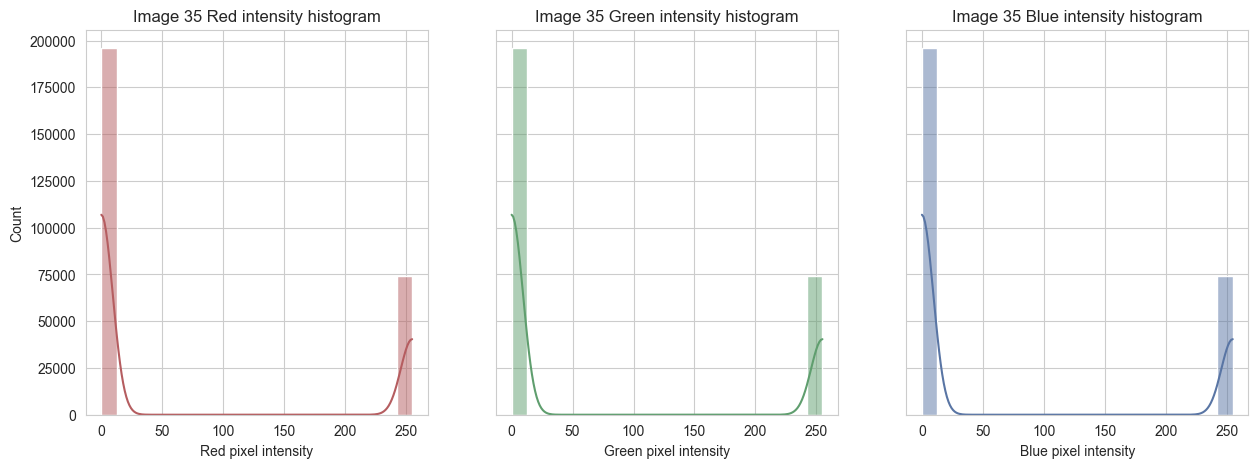

In [162]:
fig, ax = plt.subplots(ncols = 3, sharey=True, figsize=(15,5))
sns.set_style("whitegrid")

channel = ["Red", "Green", "Blue"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    ax[c].set_title(f"Image 35 {channel[c]} intensity histogram")
    ax[c].set_xlabel(f"{channel[c]} pixel intensity")
    sns.histplot(
        stat='count',
        bins='sturges',
        data=(train_channel_mask[:,:,c].flatten() * 255).astype(np.uint8),
        ax=ax[c],
        color=channel_colours[c],
        kde=True
    )
plt.show()
plt.close()

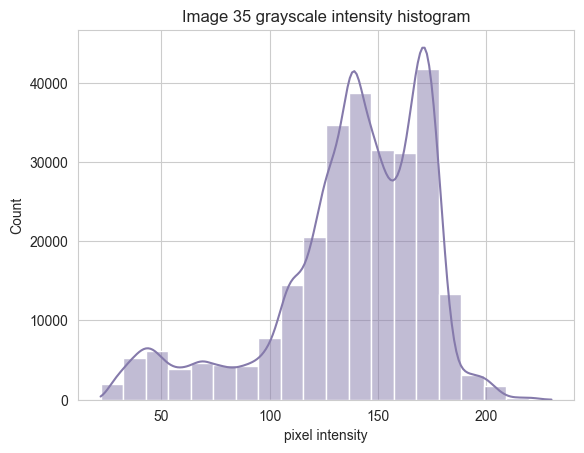

In [163]:
sns.set_style("whitegrid")
ax = sns.histplot(
    stat='count',
    bins='sturges',
    data=train_grey[:,:].flatten(),
    color="#857aab",
    kde=True
)
ax.set_title(f"Image 35 grayscale intensity histogram")
ax.set_xlabel(f"pixel intensity")
plt.show()
plt.close()

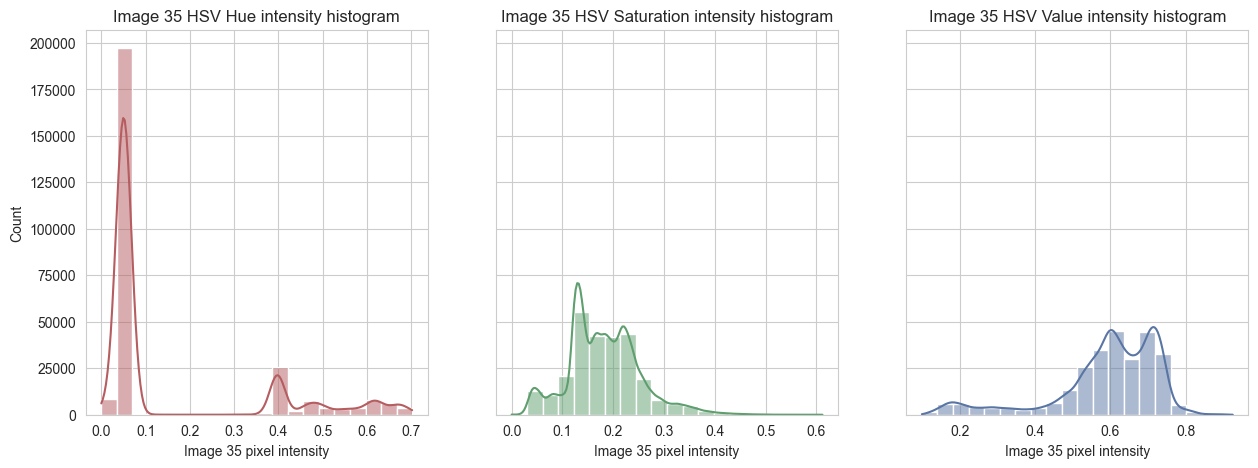

In [164]:
fig, ax = plt.subplots(ncols = 3, sharey=True, figsize=(15,5))
sns.set_style("whitegrid")

channel = ["Hue", "Saturation", "Value"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    ax[c].set_title(f"Image 35 HSV {channel[c]} intensity histogram")
    ax[c].set_xlabel(f"Image 35 pixel intensity")
    sns.histplot(
        stat='count',
        bins='sturges',
        data=train_hsv[:,:,c].flatten(),
        ax=ax[c],
        color=channel_colours[c],
        kde=True
    )
plt.show()
plt.close()

### Bayesian Classifier

* Large Model (`lm`) - All Features
* Colour Model (`colour`) - Using only RGB and HSV
* Convolution Model (`conv`) - Using the convolution features Prewitt Horizontal, Vertical and Laplacian
* PCA Modle (`pca`) - A model using Principal Component Analysis


In [165]:
print("Means")
print("All:", train_mean)
print("FG:", train_fg_mean)
print("BG:", train_bg_mean)

print("\nCovariance Matricies")
print("All:")
print(train_cov)
print("FG:")
print(train_fg_cov)
print("BG:")
print(train_bg_cov)

print("\nPixel Counts")
print("All:", train_n)
print("FG:", train_fg_n)
print("BG:", train_bg_n)

Means
All: [0.57268747 0.53163444 0.50545956 0.15602211 0.18156809 0.59028397
 6.15380741 6.07357778 6.14381111 7.42391481 7.36234074 7.45484444
 3.37878889 3.36094815 3.41775556]
FG: [ 0.42443643  0.44387282  0.47733031  0.43394114  0.17295502  0.48857541
 10.9032929  10.9158135  11.07190902 13.32533294 13.37302466 13.63482266
  7.2696183   7.29505119  7.40386018]
BG: [0.6286994  0.56479237 0.51608731 0.05101926 0.18482227 0.62871131
 4.35936559 4.24409324 4.28188628 5.19425195 5.09139527 5.11993652
 1.90876292 1.87457262 1.91173289]

Covariance Matricies
All:
[[ 2.44854526e-02  2.06427551e-02  1.77979143e-02 -1.43248916e-02
  -4.75847595e-03  2.14702026e-02 -4.58942399e-01 -4.44288319e-01
  -4.34527649e-01 -4.66412877e-01 -4.74061724e-01 -4.88126841e-01
  -9.07458943e-02 -9.40531537e-02 -9.56402830e-02]
 [ 2.06427551e-02  1.92432166e-02  1.81655539e-02 -8.12282495e-03
  -3.65930858e-03  1.98778695e-02 -3.42641926e-01 -3.24725337e-01
  -3.11370876e-01 -2.98364514e-01 -3.03382432e-01 -

In [169]:
def fg_classifier(probabilites, threshold):
    return (probabilites >= threshold).astype(np.float32)

#### Large Model

The standard model from the lab, that makes use of all $15$ available features.

In [173]:
lm_fg_pdf = scipy.stats.multivariate_normal(mean=train_fg_mean, cov=train_fg_cov, allow_singular=True)
lm_bg_pdf = scipy.stats.multivariate_normal(mean=train_bg_mean, cov=train_bg_cov, allow_singular=True)

def large_model(features):
    numerator = lm_fg_pdf.pdf(features) * train_fg_n
    denominator_fg = lm_fg_pdf.pdf(features) * train_fg_n
    denominator_bg = lm_bg_pdf.pdf(features) * train_bg_n
    denominator = denominator_fg + denominator_bg

    return np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

(np.float64(0.0), np.float64(600.0), np.float64(450.0), np.float64(0.0))

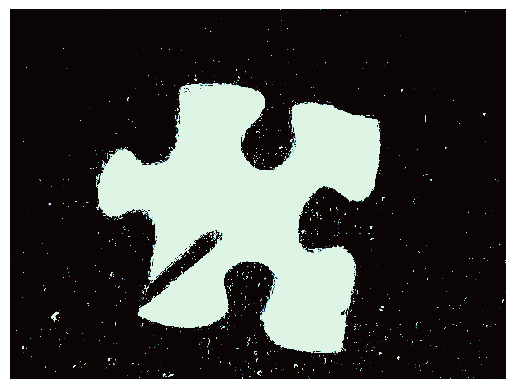

In [175]:
validate_lm_probs = large_model(validate_data)
ax = sns.heatmap(data=validate_lm_probs, cmap="mako", cbar=False)
ax.axis('off')

#### Colour Model

A model that makes use of only the RGB and HSV colour values of the image.

In [178]:
colour_fg_pdf = scipy.stats.multivariate_normal(mean=train_fg_mean[:6], cov=train_fg_cov[:6,:6], allow_singular=True)
colour_bg_pdf = scipy.stats.multivariate_normal(mean=train_bg_mean[:6], cov=train_fg_cov[:6,:6], allow_singular=True)

def colour_model(features):
    numerator = colour_fg_pdf.pdf(features) * train_fg_n
    denominator_fg = colour_fg_pdf.pdf(features) * train_fg_n
    denominator_bg = colour_bg_pdf.pdf(features) * train_bg_n
    denominator = denominator_fg + denominator_bg

    return np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

(np.float64(0.0), np.float64(600.0), np.float64(450.0), np.float64(0.0))

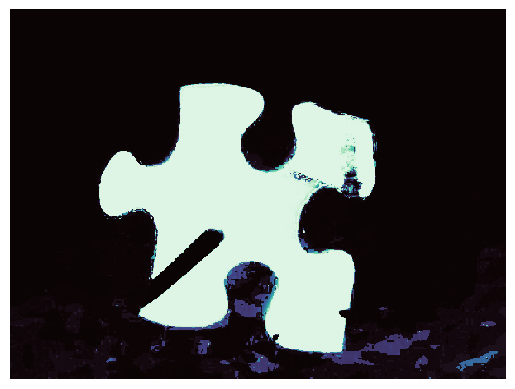

In [180]:
validate_colour_probs = colour_model(validate_data[:,:,:6])
ax = sns.heatmap(data=validate_colour_probs, cmap="mako", cbar=False)
ax.axis('off')

#### Convolution Model

A model that only uses the convolutional edge detectors in Prewitt Horizontal, Prewitt Vertical and Laplacian kernels.

In [181]:
conv_fg_pdf = scipy.stats.multivariate_normal(mean=train_fg_mean[6:], cov=train_fg_cov[6:,6:], allow_singular=True)
conv_bg_pdf = scipy.stats.multivariate_normal(mean=train_bg_mean[6:], cov=train_fg_cov[6:,6:], allow_singular=True)

def conv_model(features):
    numerator = conv_fg_pdf.pdf(features) * train_fg_n
    denominator_fg = conv_fg_pdf.pdf(features) * train_fg_n
    denominator_bg = conv_bg_pdf.pdf(features) * train_bg_n
    denominator = denominator_fg + denominator_bg

    return np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

(np.float64(0.0), np.float64(600.0), np.float64(450.0), np.float64(0.0))

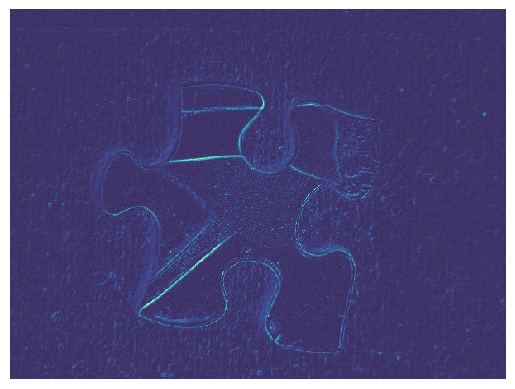

In [182]:
validate_conv_probs = conv_model(validate_data[:,:,6:])
ax = sns.heatmap(data=validate_conv_probs, cmap="mako", cbar=False)
ax.axis('off')

#### PCA Model

Principal Component Analysis is a well-known dimensionality reduction tool used in feature selection. 
This model makes use of the first principal components to account for $99\%$ of the variance in the data.

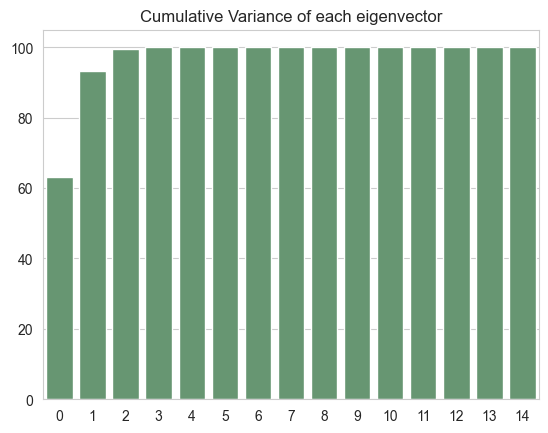

In [220]:
standard_data = (train_data[:,:] - train_mean) / np.var(train_data, axis=(1,0))
standard_cov_matrix = np.cov(standard_data.reshape(-1,15).transpose())
eigen_vals, eigen_vecs = np.linalg.eig(standard_cov_matrix)
explained_variance = eigen_vals / np.sum(eigen_vals) * 100

# 99.9% of the variance is in the first three components, so just keeping those
# print(np.cumsum(explained_variance))
ax = sns.barplot(data=np.cumsum(explained_variance), color="#5f9e6e")
ax.set_title("Cumulative Variance of each eigenvector")

projection_matrix = eigen_vecs.transpose()[:][:3].transpose()
pca_train_data = standard_data.dot(projection_matrix)

pca_mean = np.mean(pca_train_data, axis=(0,1))
pca_fg_mean = np.mean(pca_train_data[train_pixel_mask], axis=0)
pca_bg_mean = np.mean(pca_train_data[np.invert(train_pixel_mask)], axis=0)

pca_cov = np.cov(pca_train_data.reshape(-1,15).transpose())
pca_fg_cov = np.cov(pca_train_data[train_pixel_mask].transpose())
pca_bg_cov = np.cov(pca_train_data[np.invert(train_pixel_mask)].transpose())

In [214]:
pca_fg_pdf = scipy.stats.multivariate_normal(mean=pca_fg_mean, cov=pca_fg_cov, allow_singular=True)
pca_bg_pdf = scipy.stats.multivariate_normal(mean=pca_bg_mean, cov=pca_bg_cov, allow_singular=True)

def pca_model(features):
    numerator = pca_fg_pdf.pdf(features) * train_fg_n
    denominator_fg = pca_fg_pdf.pdf(features) * train_fg_n
    denominator_bg = pca_bg_pdf.pdf(features) * train_bg_n
    denominator = denominator_fg + denominator_bg

    return np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

(np.float64(0.0), np.float64(600.0), np.float64(450.0), np.float64(0.0))

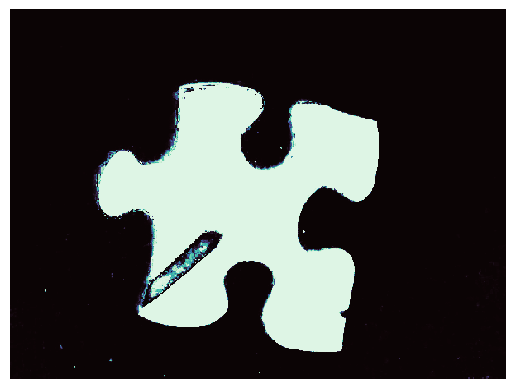

In [224]:
standard_validate_data = (validate_data[:,:] - train_mean) / np.var(train_data, axis=(1,0))
pca_validate_data = standard_validate_data.dot(projection_matrix)
validate_pca_probs = pca_model(pca_validate_data)
ax = sns.heatmap(data=validate_pca_probs, cmap="mako", cbar=False)
ax.axis('off')

### Model Evaluation

In [273]:
num_thresholds = 10
classify_thresholds = np.linspace(0., 1., num=num_thresholds)


lm_colour = "#b55d60"
colour_colour = "#5f9e6e"
conv_colour = "#597fa4"
pca_colour = "#857aab"

In [235]:
lm_results = []
colour_results = []
conv_results = []
pca_results = []

for i in range(num_thresholds):
    lm_results.append(fg_classifier(validate_lm_probs, classify_thresholds[i]).flatten())
    colour_results.append(fg_classifier(validate_colour_probs, classify_thresholds[i]).flatten())
    conv_results.append(fg_classifier(validate_conv_probs, classify_thresholds[i]).flatten())
    pca_results.append(fg_classifier(validate_pca_probs, classify_thresholds[i]).flatten())

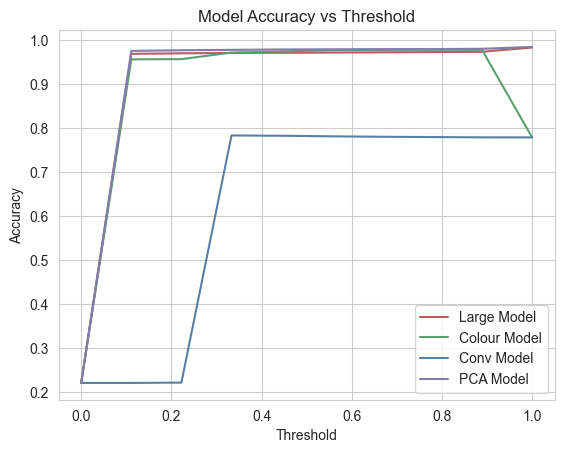

In [266]:
lm_accuracy = np.zeros(num_thresholds)
colour_accuracy = np.zeros(num_thresholds)
conv_accuracy = np.zeros(num_thresholds)
pca_accuracy = np.zeros(num_thresholds)

for i in range(num_thresholds):
    lm_accuracy[i] = skm.accuracy_score(validate_flat_mask, lm_results[i])
    colour_accuracy[i] = skm.accuracy_score(validate_flat_mask, colour_results[i])
    conv_accuracy[i] = skm.accuracy_score(validate_flat_mask, conv_results[i])
    pca_accuracy[i] = skm.accuracy_score(validate_flat_mask, pca_results[i])

plt.plot(classify_thresholds, lm_accuracy, label="Large Model", color=lm_colour)
plt.plot(classify_thresholds, colour_accuracy, label="Colour Model", color=colour_colour)
plt.plot(classify_thresholds, conv_accuracy, label="Conv Model", color=conv_colour)
plt.plot(classify_thresholds, pca_accuracy, label="PCA Model", color=pca_colour)

plt.title("Model Accuracy vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()
plt.close()

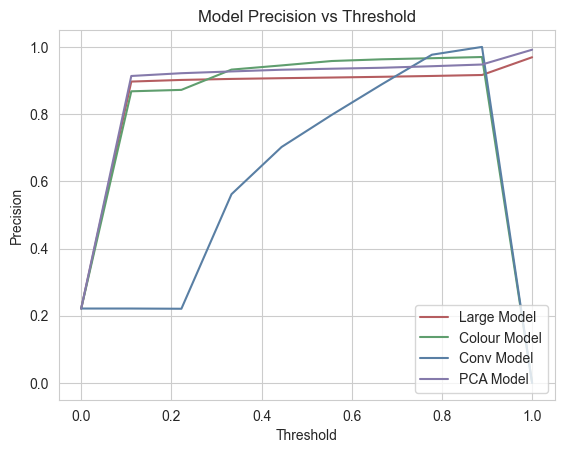

In [267]:
lm_precision = np.zeros(num_thresholds)
colour_precision = np.zeros(num_thresholds)
conv_precision = np.zeros(num_thresholds)
pca_precision = np.zeros(num_thresholds)

for i in range(num_thresholds):
    lm_precision[i] = skm.precision_score(validate_flat_mask, lm_results[i], zero_division=0.0)
    colour_precision[i] = skm.precision_score(validate_flat_mask, colour_results[i], zero_division=0.0)
    conv_precision[i] = skm.precision_score(validate_flat_mask, conv_results[i], zero_division=0.0)
    pca_precision[i] = skm.precision_score(validate_flat_mask, pca_results[i], zero_division=0.0)

plt.plot(classify_thresholds, lm_precision, label="Large Model", color=lm_colour)
plt.plot(classify_thresholds, colour_precision, label="Colour Model", color=colour_colour)
plt.plot(classify_thresholds, conv_precision, label="Conv Model", color=conv_colour)
plt.plot(classify_thresholds, pca_precision, label="PCA Model", color=pca_colour)

plt.title("Model Precision vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.show()
plt.close()

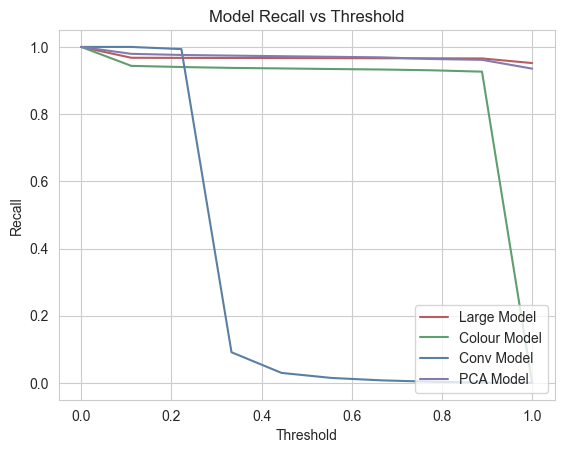

In [268]:
lm_recall = np.zeros(num_thresholds)
colour_recall = np.zeros(num_thresholds)
conv_recall = np.zeros(num_thresholds)
pca_recall = np.zeros(num_thresholds)

for i in range(num_thresholds):
    lm_recall[i] = skm.recall_score(validate_flat_mask, lm_results[i])
    colour_recall [i] = skm.recall_score(validate_flat_mask, colour_results[i])
    conv_recall[i] = skm.recall_score(validate_flat_mask, conv_results[i])
    pca_recall[i] = skm.recall_score(validate_flat_mask, pca_results[i])

plt.plot(classify_thresholds, lm_recall, label="Large Model", color=lm_colour)
plt.plot(classify_thresholds, colour_recall, label="Colour Model", color=colour_colour)
plt.plot(classify_thresholds, conv_recall, label="Conv Model", color=conv_colour)
plt.plot(classify_thresholds, pca_recall, label="PCA Model", color=pca_colour)

plt.title("Model Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.legend(loc="lower right")
plt.show()
plt.close()

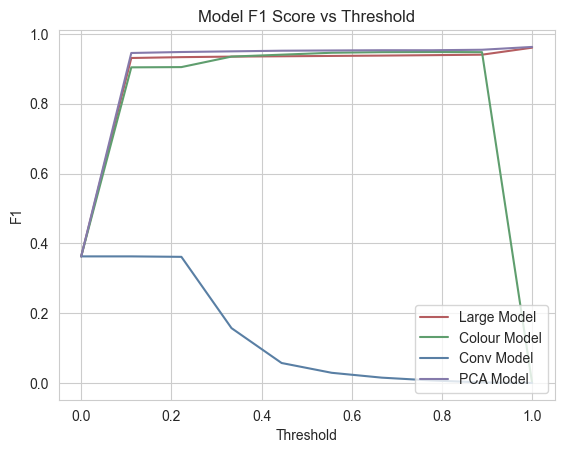

In [269]:
lm_f1 = np.zeros(num_thresholds)
colour_f1 = np.zeros(num_thresholds)
conv_f1 = np.zeros(num_thresholds)
pca_f1 = np.zeros(num_thresholds)

for i in range(num_thresholds):
    lm_f1[i] = skm.f1_score(validate_flat_mask, lm_results[i])
    colour_f1[i] = skm.f1_score(validate_flat_mask, colour_results[i])
    conv_f1[i] = skm.f1_score(validate_flat_mask, conv_results[i])
    pca_f1[i] = skm.f1_score(validate_flat_mask, pca_results[i])

plt.plot(classify_thresholds, lm_f1, label="Large Model", color=lm_colour)
plt.plot(classify_thresholds, colour_f1, label="Colour Model", color=colour_colour)
plt.plot(classify_thresholds, conv_f1, label="Conv Model", color=conv_colour)
plt.plot(classify_thresholds, pca_f1, label="PCA Model", color=pca_colour)

plt.title("Model F1 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1")
plt.legend(loc="lower right")
plt.show()
plt.close()

In [244]:
lm_confusion = np.zeros((num_thresholds, 2, 2))
colour_confusion = np.zeros((num_thresholds, 2, 2))
conv_confusion = np.zeros((num_thresholds, 2, 2))
pca_confusion = np.zeros((num_thresholds, 2, 2))

for i in range(num_thresholds):
    lm_confusion[i] = skm.confusion_matrix(validate_flat_mask, lm_results[i])
    colour_confusion[i] = skm.confusion_matrix(validate_flat_mask, colour_results[i])
    conv_confusion[i] = skm.confusion_matrix(validate_flat_mask, conv_results[i])
    pca_confusion[i] = skm.confusion_matrix(validate_flat_mask, pca_results[i])

print("LM", lm_confusion)
print("Col", colour_confusion)
print("Conv", conv_confusion)
print("PCA", pca_confusion)

LM [[[     0. 210221.]
  [     0.  59779.]]

 [[203570.   6651.]
  [  1928.  57851.]]

 [[203921.   6300.]
  [  1950.  57829.]]

 [[204137.   6084.]
  [  1964.  57815.]]

 [[204291.   5930.]
  [  1986.  57793.]]

 [[204429.   5792.]
  [  1995.  57784.]]

 [[204583.   5638.]
  [  2016.  57763.]]

 [[204758.   5463.]
  [  2030.  57749.]]

 [[204960.   5261.]
  [  2050.  57729.]]

 [[208416.   1805.]
  [  2872.  56907.]]]
Col [[[     0. 210221.]
  [     0.  59779.]]

 [[201635.   8586.]
  [  3370.  56409.]]

 [[201983.   8238.]
  [  3576.  56203.]]

 [[206163.   4058.]
  [  3733.  56046.]]

 [[206962.   3259.]
  [  3826.  55953.]]

 [[207775.   2446.]
  [  3933.  55846.]]

 [[208087.   2134.]
  [  4018.  55761.]]

 [[208288.   1933.]
  [  4159.  55620.]]

 [[208507.   1714.]
  [  4401.  55378.]]

 [[210221.      0.]
  [ 59779.      0.]]]
Conv [[[0.00000e+00 2.10221e+05]
  [0.00000e+00 5.97790e+04]]

 [[0.00000e+00 2.10221e+05]
  [1.00000e+00 5.97780e+04]]

 [[5.79000e+02 2.09642e+05]
  [3

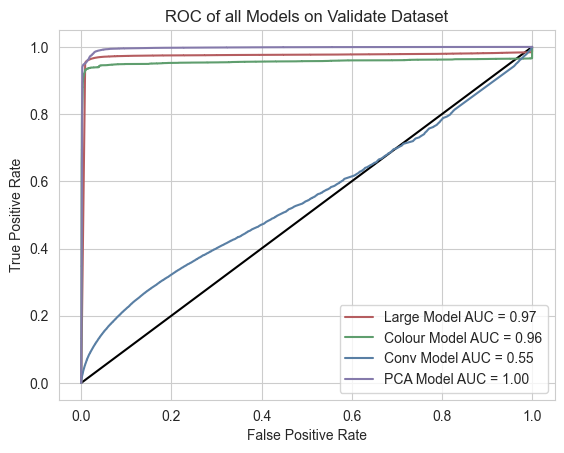

In [282]:
lm_fpr, lm_tpr, lm_roc_thresholds = skm.roc_curve(validate_flat_mask, validate_lm_probs.flatten())
colour_fpr, colour_tpr, colour_roc_thresholds = skm.roc_curve(validate_flat_mask, validate_colour_probs.flatten())
conv_fpr, conv_tpr, conv_roc_thresholds = skm.roc_curve(validate_flat_mask, validate_conv_probs.flatten())
pca_fpr, pca_tpr, pca_roc_thresholds = skm.roc_curve(validate_flat_mask, validate_pca_probs.flatten())

lm_auc = skm.roc_auc_score(validate_flat_mask, validate_lm_probs.flatten())
colour_auc = skm.roc_auc_score(validate_flat_mask, validate_colour_probs.flatten())
conv_auc = skm.roc_auc_score(validate_flat_mask, validate_conv_probs.flatten())
pca_auc = skm.roc_auc_score(validate_flat_mask, validate_pca_probs.flatten())

plt.plot([0,1],[0,1], color="black")
plt.plot(lm_fpr, lm_tpr, label=f"Large Model AUC = {lm_auc:.2f}", color=lm_colour)
plt.plot(colour_fpr, colour_tpr, label=f"Colour Model AUC = {colour_auc:.2f}", color=colour_colour)
plt.plot(conv_fpr, conv_tpr, label=f"Conv Model AUC = {conv_auc:.2f}", color=conv_colour)
plt.plot(pca_fpr, pca_tpr, label=f"PCA Model AUC = {pca_auc:.2f}", color=pca_colour)

plt.title("ROC of all Models on Validate Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
plt.close()

In [313]:
def IoU_score(mask, classified):
    union = (mask | classified)
    intersection = (mask & classified)

    return intersection.sum() / union.sum()

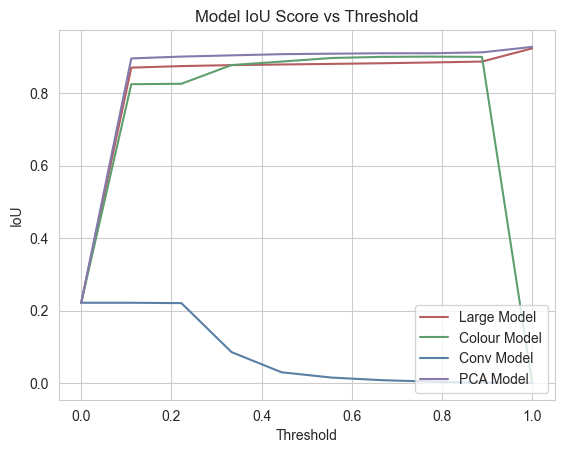

In [314]:
lm_iou = np.zeros(num_thresholds)
colour_iou = np.zeros(num_thresholds)
conv_iou = np.zeros(num_thresholds)
pca_iou = np.zeros(num_thresholds)

for i in range(num_thresholds):
    lm_iou[i] = IoU_score(validate_flat_mask, lm_results[i] == 1)
    colour_iou[i] = IoU_score(validate_flat_mask, colour_results[i] == 1)
    conv_iou[i] = IoU_score(validate_flat_mask, conv_results[i] == 1)
    pca_iou[i] = IoU_score(validate_flat_mask, pca_results[i] == 1)

plt.plot(classify_thresholds, lm_iou, label="Large Model", color=lm_colour)
plt.plot(classify_thresholds, colour_iou, label="Colour Model", color=colour_colour)
plt.plot(classify_thresholds, conv_iou, label="Conv Model", color=conv_colour)
plt.plot(classify_thresholds, pca_iou, label="PCA Model", color=pca_colour)

plt.title("Model IoU Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.legend(loc="lower right")
plt.show()
plt.close()

### Final Model

The final model chosen is the PCA model. It uses only three dimensions and has the same if not better performance than the Large Model at the same threshold.
This performance advantage exists across all metrices but is most obvious in the ROC curve. The ROC Curve indicates that the PCA model maintains a better True Positive rate then the Large Model for all False Positive rate values. Lastly, the PCA model is able to maintain a parallel level of performance to the Large Model across all thresholds, which suggests that both models are capturing the same information, but the dimension reduction of the PCA offers significant performance gains.

Additionally the PCA model performs better than the Colour only model while using even less dimensions at $3$ vs $6$.

While the other three models were able to maintain good performance, the convolution model collapses very quickly. It is unable to perform better than even a random classifier and while it performs decently at smaller thresholds, it is no where near the other models. This model also makes use of the most expensive features and is unable to adequately perform for that cost.

In [271]:
standard_test_data = (test_data[:,:] - train_mean) / np.var(train_data, axis=(1,0))
pca_test_data = standard_test_data.dot(projection_matrix)

(np.float64(0.0), np.float64(600.0), np.float64(450.0), np.float64(0.0))

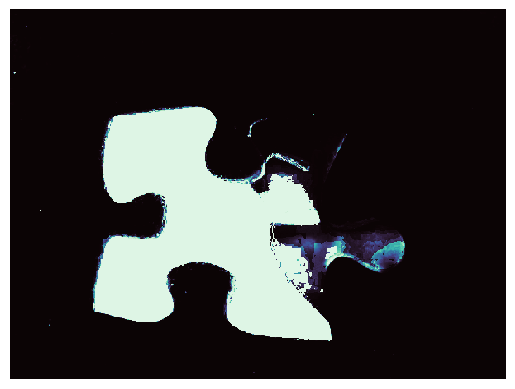

In [278]:
test_pca_probs = pca_model(pca_test_data)
ax = sns.heatmap(data=test_pca_probs, cmap="mako", cbar=False)
ax.axis('off')

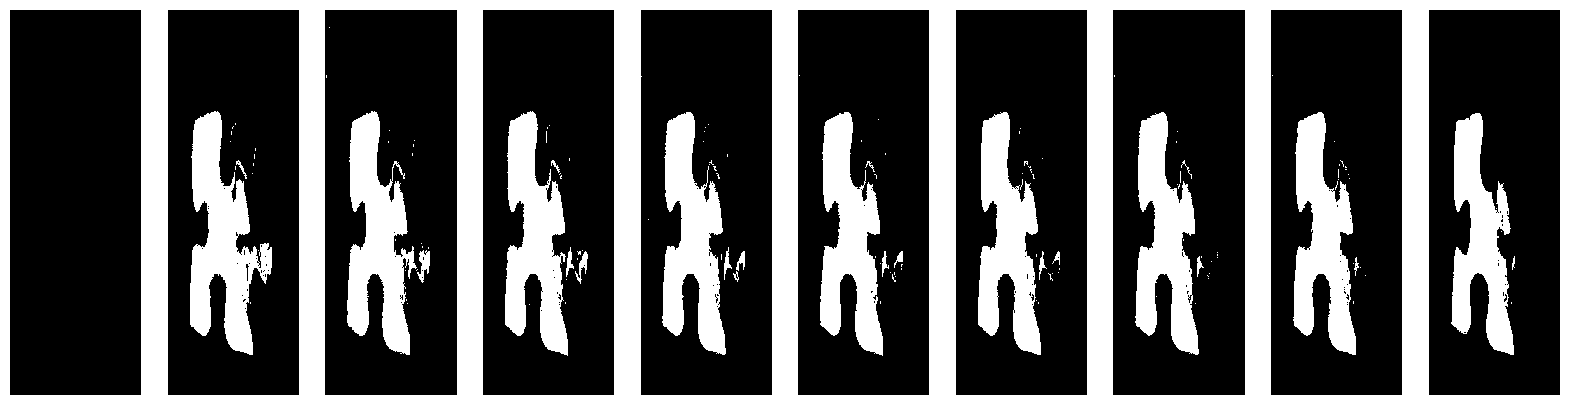

In [297]:
fig, ax = plt.subplots(ncols=num_thresholds, figsize=(20,5))

final_results = []
for i in range(num_thresholds):
    final_results.append(fg_classifier(test_pca_probs, classify_thresholds[i]).flatten())
    sns.heatmap(final_results[-1].reshape(test_image.shape[:2]), cmap="grey", cbar=False, ax=ax[i])
    ax[i].axis('off')

In [316]:
final_accuracy = np.zeros(num_thresholds)
final_precision = np.zeros(num_thresholds)
final_recall = np.zeros(num_thresholds)
final_f1 = np.zeros(num_thresholds)
final_confusion = np.zeros((num_thresholds, 2, 2))
final_iou = np.zeros(num_thresholds)

for i in range(num_thresholds):
    final_accuracy[i] = skm.accuracy_score(test_flat_mask, final_results[i])
    final_precision[i] = skm.precision_score(test_flat_mask, final_results[i])
    final_recall[i] = skm.recall_score(test_flat_mask, final_results[i])
    final_f1[i] = skm.f1_score(test_flat_mask, final_results[i])
    final_confusion[i] = skm.confusion_matrix(test_flat_mask, final_results[i])
    final_iou[i] = IoU_score(test_flat_mask, final_results[i] == 1.)

final_fpr, final_tpr, final_thresholds = skm.roc_curve(test_flat_mask, test_pca_probs.flatten())
final_auc = skm.roc_auc_score(test_flat_mask, test_pca_probs.flatten())

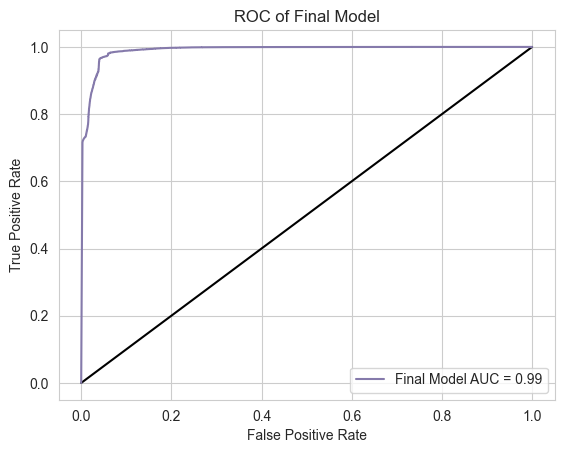

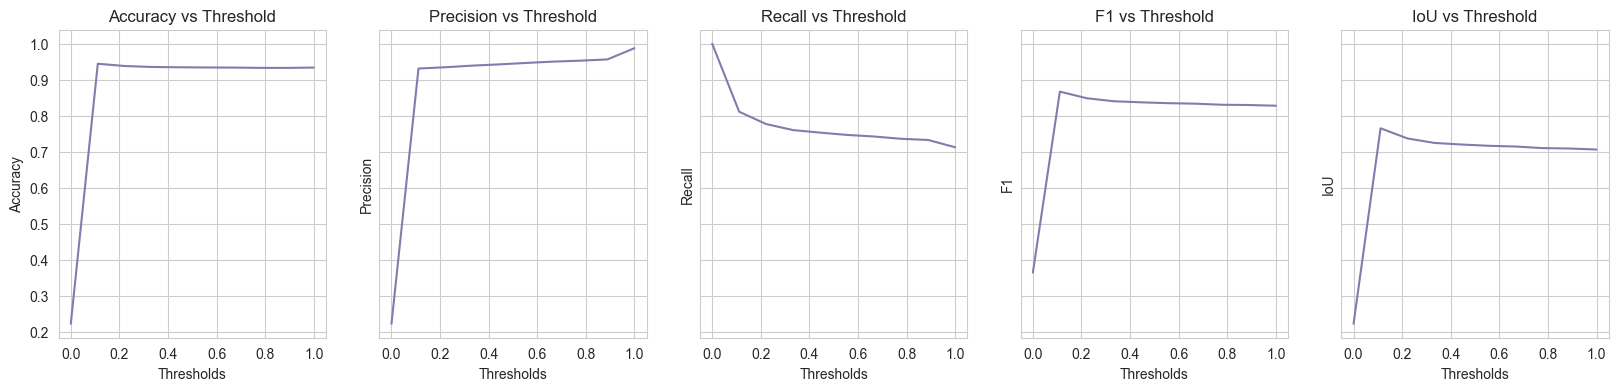

In [318]:
plt.plot([0,1],[0,1], color="black")
plt.plot(final_fpr, final_tpr, label=f"Final Model AUC = {final_auc:.2f}", color=pca_colour)

plt.title("ROC of Final Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
plt.close()

fig, ax = plt.subplots(ncols=5, figsize=(20,4), sharey=True)

ax[0].set_title("Accuracy vs Threshold")
ax[0].plot(classify_thresholds, final_accuracy, color=pca_colour)
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Thresholds")

ax[1].set_title("Precision vs Threshold")
ax[1].plot(classify_thresholds, final_precision, color=pca_colour)
ax[1].set_ylabel("Precision")
ax[1].set_xlabel("Thresholds")

ax[2].set_title("Recall vs Threshold")
ax[2].plot(classify_thresholds, final_recall, color=pca_colour)
ax[2].set_ylabel("Recall")
ax[2].set_xlabel("Thresholds")

ax[3].set_title("F1 vs Threshold")
ax[3].plot(classify_thresholds, final_f1, color=pca_colour)
ax[3].set_ylabel("F1")
ax[3].set_xlabel("Thresholds")

ax[4].set_title("IoU vs Threshold")
ax[4].plot(classify_thresholds, final_iou, color=pca_colour)
ax[4].set_ylabel("IoU")
ax[4].set_xlabel("Thresholds")

plt.show()
plt.close()

### Final Model Observation 

The final model was effective at classifying any given pixel of the image, but it struggles to classify the actual foreground correctly. This can be seen in the high accuracy score but middling F1 and recall score. This suggests that the model is effective enough as a starting point but likely needs more work.

The most obvious way to improve the model is to increase the data size. While the training on a single image was sufficient to create a good first effort, the model stumbles on the most immediate roadblock where the foreground shares similar colours to the background and thus incorrectly classify them. This can be addressed by introducing more data samples with and without this roadblock.